In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [3]:
overall_stats = pd.read_csv('ml-100k/u.info', header=None)
print("Overall statistics: ",list(overall_stats[0]))

Overall statistics:  ['943 users', '1682 items', '100000 ratings']


In [4]:
## same item id is same as movie id, item id column is renamed as movie id
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset.head() 

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
len(dataset), max(dataset['movie id']),min(dataset['movie id'])

(100000, 1682, 1)

In [6]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
column_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [7]:
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Looking at length of original items_dataset and length of unique combination of rows in items_dataset after removing movie id column

In [8]:
## looking at length of original items_dataset and length of unique combination of rows in items_dataset after removing movie id column
len(items_dataset.groupby(by=column_names2[1:])),len(items_dataset)

(1664, 1682)

We can see there are 18 extra movie id's for already mapped movie title and the same duplicate movie id is assigned to the user in the user-item dataset.

In [9]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


A dataset is created from the existing merged dataset by grouping the unique user id and movie title combination and the ratings by a user to the same movie in different instances (timestamps) are averaged and stored in the new dataset.

Example of a multiple rating scenario by an user to a specific movie:

In [11]:
merged_dataset[(merged_dataset['movie title'] == 'Chasing Amy (1997)') & (merged_dataset['user id'] == 894)]

,user id,movie id,rating,timestamp,movie title
4800,894,246,4,882404137,Chasing Amy (1997)
22340,894,268,3,879896041,Chasing Amy (1997)


In [32]:
refined_dataset = merged_dataset.groupby(by=['user id','movie title', 'movie id'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,movie id,rating
0,1,101 Dalmatians (1996),225,2.0
1,1,12 Angry Men (1957),178,5.0
2,1,"20,000 Leagues Under the Sea (1954)",141,3.0
3,1,2001: A Space Odyssey (1968),135,4.0
4,1,"Abyss, The (1989)",164,3.0


# Exploratory Data Analysis

    * Plot the counts of each rating
    * Plot rating frequency of each movie

Plot the counts of each rating

we first need to get the counts of each rating from ratings data

In [33]:
num_users = len(refined_dataset['user id'].unique())
num_items = len(refined_dataset['movie id'].unique())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1682


In [34]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
1.0,6110
2.0,11370
3.0,27145
4.0,34174
5.0,21201


Text(0, 0.5, 'number of ratings')

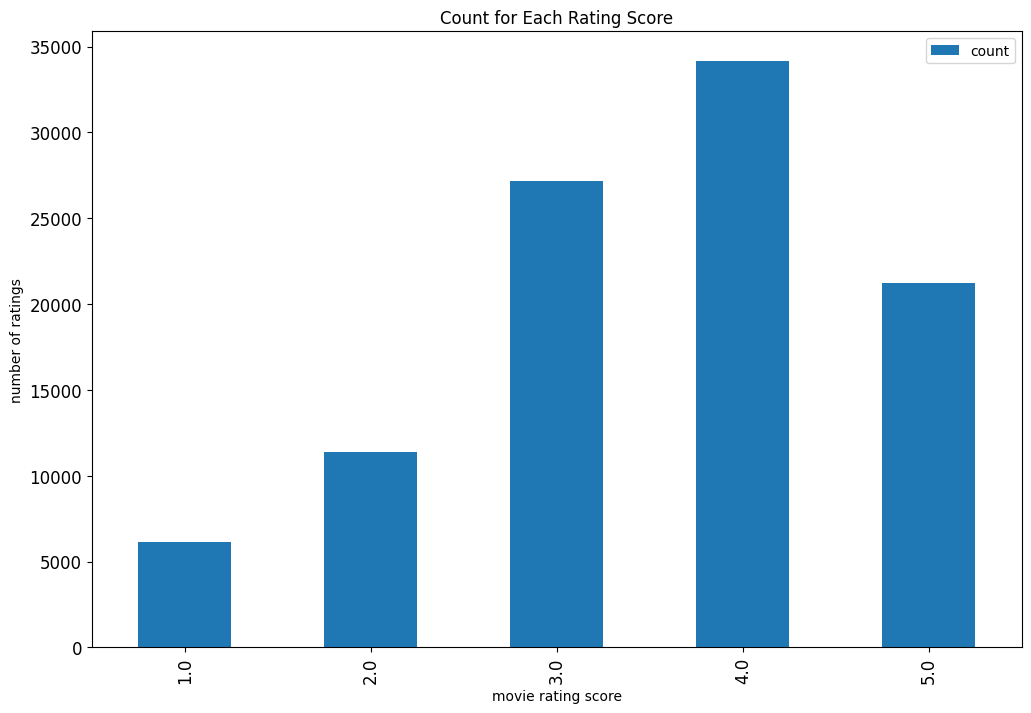

In [35]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

Ratings for the movies not seen by a user is by default considered as 0. Lets calculate and add it to the existing dataframe.

In [ ]:
total_count = num_items * num_users
zero_count = total_count-refined_dataset.shape[0]
zero_count

In [ ]:
# append counts of zero rating to df_ratings_cnt
rating_count_df = rating_count_df.append(
    pd.DataFrame({'count': zero_count}, index=[0.0]),
    verify_integrity=True,
).sort_index()
rating_count_df

Number of times no rating was given (forged as 0 in this case) is a lot more than other ratings.

So let's take log transform for count values and then we can plot them to compare

In [36]:
# add log count
rating_count_df['log_count'] = np.log(rating_count_df['count'])
rating_count_df

,count,log_count
rating,,
1.0,6110,8.717682
2.0,11370,9.338734
3.0,27145,10.208948
4.0,34174,10.439220
5.0,21201,9.961804


In [ ]:
rating_count_df = rating_count_df.reset_index().rename(columns={'index': 'rating score'})
rating_count_df

In [ ]:
ax = rating_count_df.plot('rating score', 'log_count', 'bar', figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

We have already observed from the before bar plot that ratings 3 and 4 are given in more numbers by the users. Even the above graph suggests the same.

Take away from this plot is by the number of missing ratings, we can estimate the level of sparsity in the matrix we are going to form.

Plot rating frequency of all movies

In [37]:
refined_dataset.head()

,user id,movie title,movie id,rating
0,1,101 Dalmatians (1996),225,2.0
1,1,12 Angry Men (1957),178,5.0
2,1,"20,000 Leagues Under the Sea (1954)",141,3.0
3,1,2001: A Space Odyssey (1968),135,4.0
4,1,"Abyss, The (1989)",164,3.0


In [60]:
# get rating frequency
movies_count_df = pd.DataFrame(refined_dataset.groupby('movie id').size(), columns=['count'])
movies_count_df.head()

,count
movie id,
1,452
2,131
3,90
4,209
5,86


Text(0, 0.5, 'number of ratings')

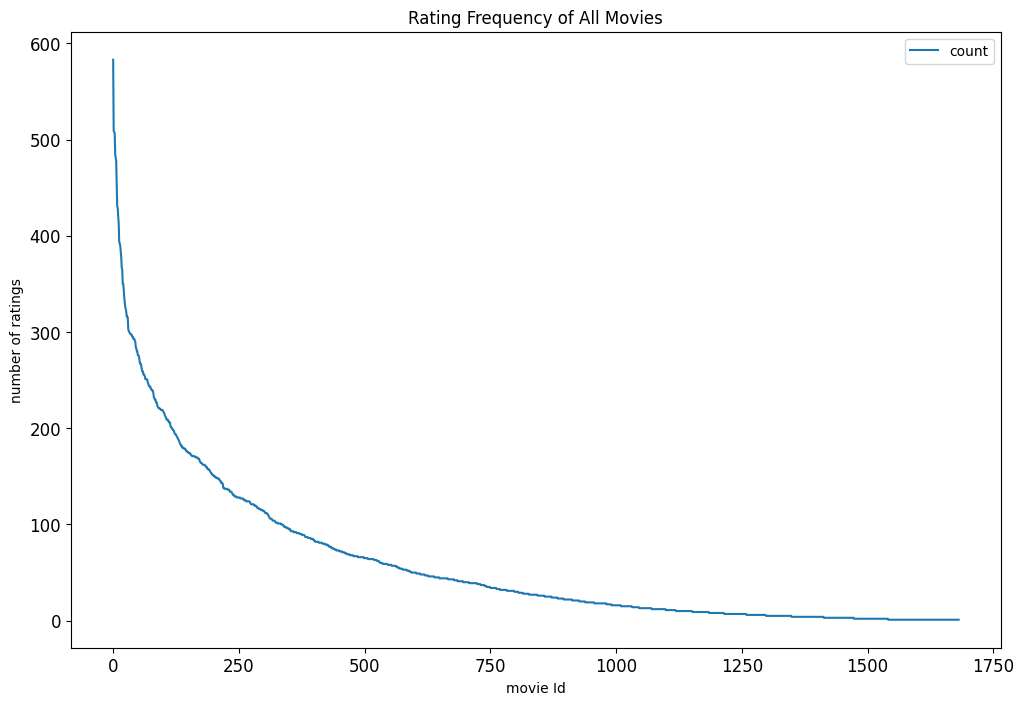

In [39]:
# plot rating frequency of all movies
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")
     

As the size of MovieLens dataset picked for this project is small. There is no need of removing rarely rated movies or users who has given rating for fewer movies.

Also because the dataset considered is small, we do not see the long-tail property which will be the scenario with the distribution of ratings.

If the dataset is larger, then (this can be referred when we do similar kind of tasks with a larger dataset, just for future reference)

The distribution of ratings among movies often satisfies a property in real-world settings, which is referred to as the long-tail property. According to this property, only a small fraction of the items are rated frequently. Such items are referred to as popular items. The vast majority of items are rated rarely. This results in a highly skewed distribution of the underlying ratings.

In [59]:
# pivot and create movie-user matrix
user_to_movie_df = refined_dataset.pivot(
    index='user id',
     columns='movie id',
      values='rating').fillna(0)

user_to_movie_df.head()

ValueError: Index contains duplicate entries, cannot reshape

In [42]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [43]:
## function to find top n similar users of the given input user 
def get_similar_users(user, n = 5):
  ## input to this function is the user and number of top similar users you want.

  knn_input = np.asarray([user_to_movie_df.values[user-1]])  #.reshape(1,-1)
  # knn_input = user_to_movie_df.iloc[0,:].values.reshape(1,-1)
  distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"users who are very much similar to the User-",user, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]


In [44]:
from pprint import pprint
user_id = 778
print(" Few of movies seen by the User:")
pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User:
['Amityville Horror, The (1979)',
 'Angels in the Outfield (1994)',
 'Apocalypse Now (1979)',
 'Apollo 13 (1995)',
 'Austin Powers: International Man of Mystery (1997)',
 'Babe (1995)',
 'Back to the Future (1985)',
 'Blues Brothers, The (1980)',
 'Chasing Amy (1997)',
 'Chasing Amy (1997)']
Top 5 users who are very much similar to the User- 778 are: 
 
1 . User: 124 separated by distance of 0.4602979332719841
2 . User: 933 separated by distance of 0.5595287320440613
3 . User: 56 separated by distance of 0.5870906615532291
4 . User: 738 separated by distance of 0.5928591482653507
5 . User: 653 separated by distance of 0.6004389535570827


In [45]:
similar_user_list, distance_list

(array([124, 933,  56, 738, 653]),
 array([0.46029793, 0.55952873, 0.58709066, 0.59285915, 0.60043895]))

In [46]:
weighted_user_distances_list = distance_list/np.sum(distance_list)
weighted_user_distances_list

array([0.16437947, 0.19981632, 0.20965911, 0.21171912, 0.21442599])

In [51]:
mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
mov_rtngs_sim_users

array([[4., 0., 0., ..., 0., 0., 0.],
       [2., 4., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 3., ..., 0., 0., 0.]])

In [52]:
movies_list = user_to_movie_df.columns
movies_list

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682],
           dtype='int64', name='movie id', length=1682)

In [53]:
weighted_user_distances_list = weighted_user_distances_list[:,np.newaxis] + np.zeros(len(movies_list))
weighted_user_distances_list.shape

(5, 1, 1682)

In [54]:
new_rating_matrix = weighted_user_distances_list*mov_rtngs_sim_users
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([[4., 0., 0., ..., 0., 0., 0.],
       [2., 4., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 3., ..., 0., 0., 0.]])

In [55]:
from pprint import pprint
def recommend_movies(n):
  n = min(len(mean_rating_list),n)
  # print(np.argsort(mean_rating_list)[::-1][:n])
  pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))

In [56]:
print("Movies recommended based on similar users are: ")
recommend_movies(10)

Movies recommended based on similar users are: 
[array([ 841, 1130, 1129, ...,  313,  275,   98]),
 array([   1, 1127, 1126, ..., 1431,  526,   96]),
 array([ 841, 1135, 1134, ...,  744,  282,    1]),
 array([ 841, 1126, 1125, ...,  197,  660,   89]),
 array([ 841, 1126, 1125, ...,  205,  202,  945])]


/tmp/ipykernel_47823/3415980310.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))
